<div align=center><h3>Goal Number 4</h3></div>
<div align=center>Within this Notebook I will be exploring the distribution and opinion of developers regarding their career satisfaction based on a variety of potentially influential fields, these will include such facets as the ability to work remotely from their place of employment, the auditory environment present in their place of work, a given employee's starting time, and potentially their current job satisfaction. All this is intended identify if any or none of these fields have any positive or negaive correlations with a developer's overall career satisfaction</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import plotly as pltly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)
import pycountry
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
pltly.tools.set_credentials_file(username='JakeMurphDS1718', api_key='VzF5mDLdeJvs2Jt9e1yR')
%matplotlib inline 
# will be based on Work remote, jobsatisfaction, hoursworked, start time, auditory environment, career satisfaction
# job satisfaction etc, compare 2012-2017

surveyAnswers = pd.read_csv('C:/Users/jakem/Desktop/Data_Sets/survey_results_public.csv')

In [2]:
worldMap = {country.name: country.alpha3 for country in pycountry.countries}
worldMapDataList = []

for country in worldMap:
    worldMapData = {'Country': country, 'Code': worldMap[country], 'Total': (surveyAnswers.Country == country).sum(), 
            '10' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==10)])),
            '9' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==9)])),
            '8' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==8)])),
            '7' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==7)])),
            '6' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==6)])),
            '5' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==5)])),
            '4' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==4)])),
            '3' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==3)])),
            '2' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==2)])),
            '1' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==1)])),
            '0' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction']==0)])),
            'NA': str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['JobSatisfaction'].isnull())]))}
    worldMapDataList.append(worldMapData)
    
df = pd.DataFrame(worldMapDataList) # creating panda object

In [3]:
df['firstVersion'] = df['Country'] + "<br>10 : " + df['10'] + "<br>9 : " + df['9'] + "<br>8 : " + df['8'] + "<br>7 : " \
                    + df['7'] + "<br>6 : " + df['6'] + "<br>5 : " + df['5'] + "<br>4 : " + df['4'] + "<br>3 : " + df['3'] \
                    + "<br>2 : " + df['2'] + "<br>1 : " + df['1'] + "<br>0 : " + df['0'] + "<br>NA : " + df['NA'] 

data = [ dict(
        type = 'choropleth',
        locations = df['Code'],
        z = df['Total'],
        text = df['firstVersion'],
        colorscale = [[0,"rgb(0,100,0)"],[0.35,"rgb(34,139,34)"],[0.5,"rgb(50,205,50)"],\
            [0.6,"rgb(124,252,0)"],[0.7,"rgb(173,255,47)"],[1,"rgb(200,250,200)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Respondents<br>Thousands'),
      ) ]

layout = dict(
    title = '2017 Stackoverflow Job Satisfaction<br>Dataset Available @ \
            <a href="https://insights.stackoverflow.com/survey/">\
            Stack Overflow Annual Developer Survey</a>',
    geo = dict(
        showframe = False,
        showlakes = True,
        lakecolor = "rgb(55, 255, 255)",
        showcoastlines = True,
        projection = dict(
            type = 'orthographic'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)

In [4]:
#cleaning up the dataset for goal 
#surveyAnswers = surveyAnswers[surveyAnswers.JobSatisfaction.notnull()]
surveyAnswers
surveyAnswers = surveyAnswers[surveyAnswers.CareerSatisfaction.notnull()]

surveyAnswers['HomeRemote'] = surveyAnswers['HomeRemote'].replace('All or almost all the time (I\'m full-time remote)',7)
surveyAnswers['HomeRemote'] = surveyAnswers['HomeRemote'].replace('More than half, but not all, the time', 6)
surveyAnswers['HomeRemote'] = surveyAnswers['HomeRemote'].replace('About half the time', 5)
surveyAnswers['HomeRemote'] = surveyAnswers['HomeRemote'].replace('Less than half the time, but at least one day each week', 4)
surveyAnswers['HomeRemote'] = surveyAnswers['HomeRemote'].replace('A few days each month', 3)
surveyAnswers['HomeRemote'] = surveyAnswers['HomeRemote'].replace('It\'s complicated', 2)
surveyAnswers['HomeRemote'] = surveyAnswers['HomeRemote'].replace('Never', 1)
surveyAnswers = surveyAnswers[surveyAnswers.HomeRemote.notnull()]

#X = surveyAnswers['HomeRemote'].values[:,np.newaxis]
X = surveyAnswers['CareerSatisfaction'].values[:,np.newaxis]
#, 'AssessJobRemote'
y = surveyAnswers['HomeRemote'].values

model = LinearRegression()

model.fit(X, y)
###############################

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

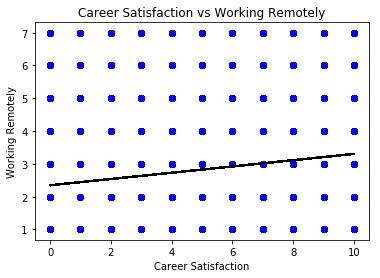

In [5]:
plt.scatter(X, y,color='b')

plt.title('Career Satisfaction vs Working Remotely')  
plt.xlabel('Career Satisfaction')  
plt.ylabel('Working Remotely')

plt.plot(X, model.predict(X),color='k')

plt.show()

<div><h3>Career Satisfaction vs Time Working Remote<h3></div>
<div>The results of this linear regression test show that there is a relation between working remotely and job satisfaction, wherein it can be said that if a person works remotely a few days each month, they will have a greater sense of career satisfaction.<br>
This correlation is justifiable, as it provides an insight into internal values of a developer. This may infer that through the allowance of a developer to work from home, the developer is shown that their employer has confidence in their ability to work and create software, work to deadlines etc, on their own initiative. This trust would naturally have a positive impact on the outlook of the employee and result in a more positive experience</div>

In [6]:
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('Midnight', 24)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('11:00 pm', 23)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('10:00 pm', 22)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('9:00 pm', 21)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('8:00 pm', 20)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('7:00 pm', 19)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('6:00 pm', 18)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('5:00 pm', 17)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('4:00 pm', 16)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('3:00 pm', 15)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('2:00 pm', 14)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('1:00 pm', 13)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('Noon', 12)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('11:00 am', 11)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('10:00 am', 10)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('9:00 am', 9)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('8:00 am', 8)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('7:00 am', 7)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('6:00 am', 6)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('5:00 am', 5)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('4:00 am', 4)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('3:00 am', 3)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('2:00 am', 2)
surveyAnswers['WorkStart'] = surveyAnswers['WorkStart'].replace('1:00 am', 1)
surveyAnswers = surveyAnswers[surveyAnswers.WorkStart.notnull()]

X = surveyAnswers['WorkStart'].values[:,np.newaxis]
#, 'AssessJobRemote'
y = surveyAnswers['CareerSatisfaction'].values

model = LinearRegression()

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

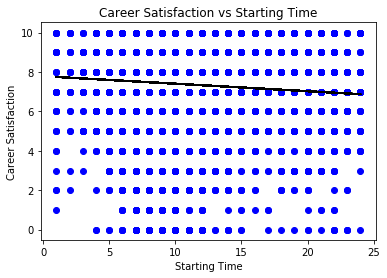

In [7]:
plt.scatter(X, y,color='b')

plt.title('Career Satisfaction vs Starting Time')  
plt.xlabel('Starting Time')  
plt.ylabel('Career Satisfaction')

plt.plot(X, model.predict(X),color='k')

plt.show()

<div><h3>Career Satisfaction vs Starting Time</h3></div>
<div>The results of this linear regression test show that there is not a substantial influence, however there is a negative correlation between an employee's start time, and their overall career satisfaction. <br>This may be due to the fact that earlier mornings allow for earlier end times. As an example, in a situation of a 7.5 hour work day, a start of 7am, which results in a career satisfaction of ~7.7, will end at 2:30pm in the day. <br>In this situation it allows a developer an opportunity to also avail of daytime facilities at their leisure, which may naturally allow improved opinion of their overall situation.<br>
This is counter to a start time that is later in the day, such as 3pm etc will result in an end time of 10:30pm.<br> This outcome correlates with a lesser satisfaction score due to the fact that at this time a developer may reap the rewards of early morning activities, however be later restricted and very limited in their options. This limitation, and proximity to their bedtime, give them too much a sense of an awake -> work -> sleep regime</div>

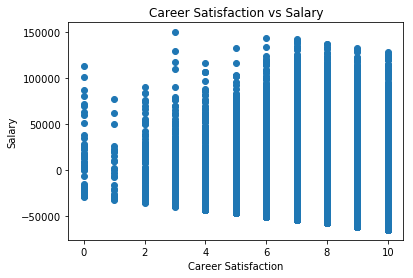

In [8]:
surveyAnswers = pd.read_csv('C:/Users/jakem/Desktop/Data_Sets/survey_results_public.csv')
 
surveyAnswers = surveyAnswers[surveyAnswers.Salary.notnull()]
surveyAnswers = surveyAnswers[surveyAnswers.CareerSatisfaction.notnull()]
#surveyAnswers = surveyAnswers[surveyAnswers['CareerSatisfaction']>0]
Salary = surveyAnswers['Salary']
CareerSatisfaction = surveyAnswers['CareerSatisfaction']
#x = Salary[:, np.newaxis]
x = CareerSatisfaction[:, np.newaxis]
#y = CareerSatisfaction
y = Salary
reg = LinearRegression()
reg.fit(x,y)
y_pred = reg.predict(x)
residual = y - y_pred
plt.title('Career Satisfaction vs Salary')  
plt.xlabel('Career Satisfaction')  
plt.ylabel('Salary')
plt.scatter(x,residual)

<div><h3>Career Satisfaction by Salary</h3></div>
<div>The above diagram shows the dispersion of values from the survey relative to the career satisfaction of the particular developer. This relation shows, given by the clustering of values at the higher salary values, that in general the higher a developer's salary is, the more likely they are to be satisfied with their careers. And similarly, the lower the developer's salary is, the less satisfied with their careers they will be.<br>
The outliers with higher or lower salaries at respective ends of the scale may have lower or higher career satisfaction scores based on the country of residence. A developer living in the likes of Poland, due to a general lower cost of living, may find greater satisfaction in a lower salary, while a developer in a place with cost of living such as Tokyo may require a much higher salary to achieve the same level of satisfaction.<br>
The causality behind the lower overall happiness may also stem from the relative stress and responsibility that certain positions place on a particular employee</div>

In [9]:
##career vs job satisfaction
surveyAnswers = surveyAnswers[surveyAnswers.JobSatisfaction.notnull()]

#X = surveyAnswers['HomeRemote'].values[:,np.newaxis]
X = surveyAnswers['CareerSatisfaction'].values[:,np.newaxis]
#, 'AssessJobRemote'
y = surveyAnswers['JobSatisfaction'].values

model = LinearRegression()

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

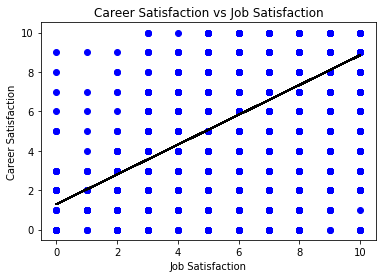

In [10]:
plt.scatter(X, y,color='b')

plt.plot(X, model.predict(X),color='k')

plt.title('Career Satisfaction vs Job Satisfaction')  
plt.xlabel('Job Satisfaction')  
plt.ylabel('Career Satisfaction')

plt.show()

<div><h3>Career Satisfaction vs Job Satisfaction</h3></div>
<div>The above diagram shows the association between job satisfaction and career satisfaction. As one may expect, these two are almost directly correlated and influential upon each other, where a developer with a poor opinion of their current job will have a poor opinion of their career, and inverse. While the overwhelming trend, as given by the results above, indicate that a developer that is happy or unhappy in their current job position <b>will</b> also have a likewise positive or negative opinion of their overall career, there are outliers diagonally above and below the line of prediction. These values may be taken as potential false answers, or may be an indication that while a person may be fully satisfied with their current job, they may have severe worries with regards to their future career options, or similarly on the opposing side of the spectrum, there may be a developer who is appalled by the awful situation of their current job, but may have had an incredibly fulfilling career up to that point.</div>

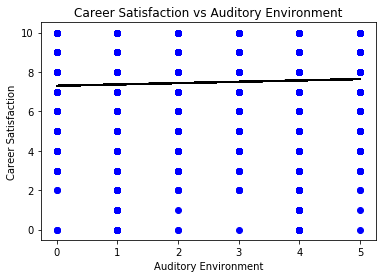

In [11]:

surveyAnswers['AuditoryEnvironment'] = surveyAnswers['AuditoryEnvironment'].replace('Put on a movie or TV show', 5)
surveyAnswers['AuditoryEnvironment'] = surveyAnswers['AuditoryEnvironment'].replace('Turn on some music', 4)
surveyAnswers['AuditoryEnvironment'] = surveyAnswers['AuditoryEnvironment'].replace('Turn on the news or talk radio', 3)
surveyAnswers['AuditoryEnvironment'] = surveyAnswers['AuditoryEnvironment'].replace('Put on some ambient sounds (e.g. whale songs, forest sounds)', 2)
surveyAnswers['AuditoryEnvironment'] = surveyAnswers['AuditoryEnvironment'].replace('Keep the room absolutely quiet', 1)
surveyAnswers['AuditoryEnvironment'] = surveyAnswers['AuditoryEnvironment'].replace('Something else', 0)

surveyAnswers = surveyAnswers[surveyAnswers.AuditoryEnvironment.notnull()]
surveyAnswers = surveyAnswers[surveyAnswers.CareerSatisfaction.notnull()]



X = surveyAnswers['AuditoryEnvironment'].values[:,np.newaxis]
#y = CareerSatisfaction
y = surveyAnswers['CareerSatisfaction'].values

model = LinearRegression()

model.fit(X, y)

plt.scatter(X, y,color='b')

plt.plot(X, model.predict(X),color='k')

plt.title('Career Satisfaction vs Auditory Environment')  
plt.xlabel('Auditory Environment')  
plt.ylabel('Career Satisfaction')

plt.show()


<div><h3>Career Satisfaction vs Auditory Environment</h3></div>
<div>The above linear regression graph shows that there is a very slight positive correlation between the auditory environment a developer is exposed to, and their overall career satisfaction. This could be due to the fact that a rather large amount of individuals find it easier to concentrate and work in an environment with a moderate amount of sound. This consistent background ambient noise would serve to fill a developer's auditory channels and allow them to focus their efforts into their work, and also the addition of some pleasant noise to a workplace would greatly serve to improve an individual's mood and in turn their overall enjoyment of their career.</div>

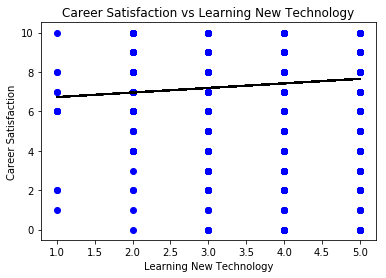

In [12]:
surveyAnswers['LearningNewTech'] = surveyAnswers['LearningNewTech'].replace('Strongly agree', 5)
surveyAnswers['LearningNewTech'] = surveyAnswers['LearningNewTech'].replace('Agree', 4)
surveyAnswers['LearningNewTech'] = surveyAnswers['LearningNewTech'].replace('Somewhat agree', 3)
surveyAnswers['LearningNewTech'] = surveyAnswers['LearningNewTech'].replace('Disagree', 2)
surveyAnswers['LearningNewTech'] = surveyAnswers['LearningNewTech'].replace('Strongly disagree', 1)
surveyAnswers = surveyAnswers[surveyAnswers.LearningNewTech.notnull()]

X = surveyAnswers['LearningNewTech'].values[:,np.newaxis]
#y = CareerSatisfaction
y = surveyAnswers['CareerSatisfaction'].values

model = LinearRegression()

model.fit(X, y)

plt.scatter(X, y,color='b')

plt.plot(X, model.predict(X),color='k')

plt.title('Career Satisfaction vs Learning New Technology')  
plt.xlabel('Learning New Technology')  
plt.ylabel('Career Satisfaction')

plt.show()

<div><h3>Career Satisfaction vs Learning New Technology</h3></div>
<div>The above linear regression graph shows that there is a very slight positive correlation between a developer's overall career satisfaction and their attitude towards the learning of new programming languages. This correlation suggests that the more open a programmer is to the learning of a language, the more satisfied they may be in their overall career due to the potential opportunities the learning of a new language could provide to them. On a more personal level this could be due to the sense of self-fulfilment for a developer upon becoming multilingual and expanding the amount of technology open to them that they can tinker with in their free time.</div>

In [13]:
#the creation of this plot is too heavy duty and will substantially slow the machines of users with low RAM
#instead rendered the image to the code below

#import plotly.plotly as py
#import plotly.figure_factory as ff

#import numpy as np

# Add histogram data
#x1 = surveyAnswers["CareerSatisfaction"]  
#x2 = surveyAnswers["JobSatisfaction"]  
#x3 = surveyAnswers["AuditoryEnvironment"]
#x4 = surveyAnswers["LearningNewTech"]  

# Group data together
#hist_data = [x1, x2, x3, x4]

#group_labels = ['Career Satisfaction', 'Job Satisfaction', 'Auditory Environment', 'Learning New Technology']

# Create distplot with custom bin_size
#fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

#py.iplot(fig, filename='Distplot of Factors')


<img src="https://i.imgur.com/1KJOXI5.png" />

<div><h3>Distribution of Attitudes</h3></div>
<div>The above logarithmic distribution chart shows the distribution and weighting of decisions in each of the categories noted in the legend in the top right of the image. The data shows that there is a strong correlation of answers between Learning New Technology and Auditory Environment(the darker red on the largest column is green) and similarly showing through the frequency sign wave generated, it can be observed that the green and red waves are of a similar magnitude at this point. Also towards the right of the graph it can be seen that a very similar concentration of opinions exists with regards to overall happiness, and this corroborates the idea that one will influence the other in a positive or negative fashion.</div>

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

# Scientific libraries
import numpy as np
from scipy.optimize import curve_fit

#import again to ensure all possible data points are hit and there is no information loss
surveyAnswers = pd.read_csv('C:/Users/jakem/Desktop/Data_Sets/survey_results_public.csv')

#switched the values of y and x just to test
###switching the y and x was a mistake
x = np.array([len(surveyAnswers[(surveyAnswers['JobSatisfaction']==0)]),
             len(surveyAnswers[(surveyAnswers['JobSatisfaction']==1)]),
             len(surveyAnswers[(surveyAnswers['JobSatisfaction']==2)]),
             len(surveyAnswers[(surveyAnswers['JobSatisfaction']==3)]),
             len(surveyAnswers[(surveyAnswers['JobSatisfaction']==4)]),
             len(surveyAnswers[(surveyAnswers['JobSatisfaction']==5)]),
             len(surveyAnswers[(surveyAnswers['JobSatisfaction']==6)]),
             len(surveyAnswers[(surveyAnswers['JobSatisfaction']==7)]),
             len(surveyAnswers[(surveyAnswers['JobSatisfaction']==8)]),
             len(surveyAnswers[(surveyAnswers['JobSatisfaction']==9)]),
             len(surveyAnswers[(surveyAnswers['JobSatisfaction']==10)])])
y = np.array([10,9,8,7,6,5,4,3,2,1,0])

def exponential_func(x, a, b, c):
    return a*np.exp(-b*x)+c


popt, pcov = curve_fit(exponential_func, x, y, p0=(1, 1e-6, 1))

xx = np.linspace(0, 9000, 3000)
yy = exponential_func(xx, *popt)

# Creating the dataset, and generating the plot
trace1 = go.Scatter(
                  x=x,
                  y=y,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 127, 14)'),
                  name='Data'
                  )

trace2 = go.Scatter(
                  x=xx,
                  y=yy,
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

annotation = go.Annotation(
                  x=2000,
                  y=10,
                  text='$\textbf{Fit}: 163.56e^{-0.00097x} - 1.16$',
                  showarrow=False
                  )
layout = go.Layout(
                title='Exponential Fit of Job Satisfaction',
                plot_bgcolor='rgb(229, 229, 229)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,200)', gridcolor='rgb(255,255,255)'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,200)', gridcolor='rgb(255,255,255)'),
                  annotations=[annotation]
                )

data = [trace1, trace2]
#fig = go.Figure(data=data, layout=layout)

#py.plot(fig, filename='Exponential-Fit-in-python')

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)

<div><h3>Exponential Curve Fit of Job Satisfaction</h3></div>
<div>The above logarithmic chart shows the distribution of data points pertaining to job satisfaction as represented in the developer survey. The curve fit represented shows that there is a significant downward trend in terms of developer happiness. While it might have been expected through the rule of standard deviation, what the data shows is that there is a substantial portion of the developer world that is moderately to severly unhappy with their work situation and job satisfaction. This could be owed to anything from the country of work, the type of work, or all round environment in which they are working. The distribution shows that only (500/64000)0.78% rate their job satisfaction as 10, while a staggering (9000/64000) 14.0625% rate their position as only 2, with the combined votes expressely below the threshold of 5 accounting for almost 50% of total respondents, (31874/64000) 49.8%. </div>